In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
gs = gpd.read_file("Historical SNAP Retailer Locator Data as of 20201231edited.csv")

In [3]:
gs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Store_Name          1377 non-null   object  
 1   Store_Chain         1377 non-null   object  
 2   Store_Type          1377 non-null   object  
 3   Street_Number       1377 non-null   object  
 4   Street_Name         1377 non-null   object  
 5   Additional Address  1377 non-null   object  
 6   City                1377 non-null   object  
 7   State               1377 non-null   object  
 8   Zip_Code            1377 non-null   object  
 9   County              1377 non-null   object  
 10  Latitude            1377 non-null   object  
 11  Longitude           1377 non-null   object  
 12  Authorization_Date  1377 non-null   object  
 13  geometry            0 non-null      geometry
dtypes: geometry(1), object(13)
memory usage: 150.7+ KB


In [4]:
type(gs)

geopandas.geodataframe.GeoDataFrame

In [5]:
gs.head()

Store_Name      Store_Chain   Store_Type Street_Number  \
0  99 Ranch Market 38  99 Ranch Market  Super Store           345   
1  99 RANCH MARKET 17  99 Ranch Market  Super Store         17713   
2  99 Ranch Market 18  99 Ranch Market  Super Store          1625   
3   99 RANCH MARKET 7  99 Ranch Market  Super Store          1300   
4   99 Ranch Market 3  99 Ranch Market  Super Store          1015   

         Street_Name Additional Address              City State Zip_Code  \
0          E Main St                             Alhambra    CA    91801   
1       Pioneer Blvd                              Artesia    CA    90701   
2        S Azusa Ave                     Hacienda Heights    CA    91745   
3  S Golden West Ave                              Arcadia    CA    91007   
4       S Nogales St                      Rowland Heights    CA    91748   

        County  Latitude  Longitude Authorization_Date geometry  
0  LOS ANGELES  34.09719  -118.1227         05/20/2015     None  
1  LOS ANGELES  33.87005  -118.0824         11/14/2003     None  
2  LOS ANGELES  33.99284  -117.9318         05/01/1998     None  
3  LOS ANGELES  34.12338  -118.0597         09/04/1992     None  
4  LOS ANGELES  33.99646  -117.8884         04/13/1989     None

In [6]:
desired_columns = ['Store_Name','Store_Chain','Street_Number','Street_Name', 'Additional Address','City','Zip_Code','Latitude','Longitude']
gs[desired_columns].sample(5)

Store_Name  Store_Chain Street_Number    Street_Name  \
26        ALBERTSONS #6334 432   Albertsons          1010     E Avenue J   
919               Sprouts 0264      Sprouts         15801  Whittier Blvd   
778          SAV ON DRUG  9419  Sav_on_drug        10755E       South St   
645  RALPHS GROCERY COMPANY 87       Ralphs          1050  N Western Ave   
877          SMART & FINAL 330  Smart&final         10113    Venice Blvd   

    Additional Address         City Zip_Code  Latitude  Longitude  
26                        Lancaster    93535  34.68944  -118.1117  
919                        Whittier    90603  33.94408  -117.9924  
778                        Cerritos    90703  33.85838  -118.1065  
645                       San Pedro    90732  33.75298  -118.3088  
877                     Los Angeles    90034  34.02198  -118.4014

In [7]:
gs_trimmed = gs[desired_columns].copy()
gs_trimmed

Store_Name      Store_Chain Street_Number  \
0           99 Ranch Market 38  99 Ranch Market           345   
1           99 RANCH MARKET 17  99 Ranch Market         17713   
2           99 Ranch Market 18  99 Ranch Market          1625   
3            99 RANCH MARKET 7  99 Ranch Market          1300   
4            99 Ranch Market 3  99 Ranch Market          1015   
...                        ...              ...           ...   
1372  Whole Foods Market 10177      Whole_Foods          6350   
1373  Whole Foods Market 10536      Whole_Foods         12746   
1374  Whole Foods Market 10545      Whole_Foods          3401   
1375  Whole Foods Market 10383      Whole_Foods           500   
1376  Whole Foods Market 10173      Whole_Foods          2201   

            Street_Name Additional Address              City Zip_Code  \
0             E Main St                             Alhambra    91801   
1          Pioneer Blvd                              Artesia    90701   
2           S Azusa Ave                     Hacienda Heights    91745   
3     S Golden West Ave                              Arcadia    91007   
4          S Nogales St                      Rowland Heights    91748   
...                 ...                ...               ...      ...   
1372           W 3rd St                          Los Angeles    90036   
1373   W Jefferson Blvd                          Playa Vista    90094   
1374        W Olive Ave                              Burbank    91505   
1375      Wilshire Blvd                         Santa Monica    90401   
1376      Wilshire Blvd                         Santa Monica    90403   

      Latitude  Longitude  
0     34.09719  -118.1227  
1     33.87005  -118.0824  
2     33.99284  -117.9318  
3     34.12338  -118.0597  
4     33.99646  -117.8884  
...        ...        ...  
1372  34.07133  -118.3603  
1373  33.97406  -118.4257  
1374  34.15423  -118.3369  
1375  34.01985  -118.4973  
1376  34.03286  -118.4814  

[1377 rows x 9 columns]

In [8]:
gs_trimmed.columns.to_list()

['Store_Name',
 'Store_Chain',
 'Street_Number',
 'Street_Name',
 'Additional Address',
 'City',
 'Zip_Code',
 'Latitude',
 'Longitude']

In [9]:
gs_trimmed.Store_Chain.unique().tolist()

['99 Ranch Market',
 'Albertsons',
 'Aldi',
 'Amazon',
 'Best_way_supermarket',
 'Big_k_mart',
 'Big_saver_food',
 'Buy_low',
 'Carniceria_Vallarta',
 'Costco_Wholesale',
 'El_Super',
 'Food_4_Less',
 'Fresh&Easy',
 'Galleria',
 'Gelsons',
 'Gigante',
 'Grocery_Outlet',
 'H_mart',
 'Haggen',
 'Hong_kong_supermarket',
 'Hows',
 'Island_Pacific',
 'Jons',
 'Kmart',
 'Mother_Nutrition',
 'Northgate',
 'Numero_uno',
 'Payless_food',
 'R_ranch',
 'Ralphs',
 'Sams_club',
 'Sav_on_drug',
 'Seafood_city',
 'Smart&final',
 'Sprouts',
 'Stater_bros',
 'Super_A_food',
 'Super_king',
 'Superior_grocers',
 'Target',
 'Top_valu',
 'Trader_joes',
 'Vallarta',
 'Valu_plus',
 'Vons',
 'Walmart',
 'Whole_Foods']

In [10]:
number_stores = gs_trimmed.Store_Chain.value_counts().reset_index()
number_stores.to_csv('number_stores.csv')

In [11]:
number_stores

index  Store_Chain
0                  Ralphs          145
1                    Vons          111
2             Smart&final           99
3              Albertsons           97
4                  Target           76
5        Mother_Nutrition           65
6             Trader_joes           60
7             Food_4_Less           54
8                 Walmart           49
9              Fresh&Easy           47
10            Sav_on_drug           44
11       Superior_grocers           33
12            Whole_Foods           33
13             Numero_uno           30
14            Stater_bros           29
15               El_Super           28
16                Sprouts           27
17               Vallarta           27
18                   Aldi           27
19       Costco_Wholesale           26
20              Northgate           20
21                 Haggen           19
22                   Jons           19
23                Gelsons           17
24         Grocery_Outlet           16
25                  Kmart           14
26           Super_A_food           13
27         Big_saver_food           13
28           Payless_food           11
29   Best_way_supermarket           10
30             Big_k_mart           10
31        99 Ranch Market           10
32              Sams_club           10
33               Top_valu            9
34                Buy_low            8
35              Valu_plus            8
36         Island_Pacific            8
37           Seafood_city            7
38                 H_mart            7
39                Gigante            7
40                R_ranch            7
41             Super_king            6
42                   Hows            6
43  Hong_kong_supermarket            5
44                 Amazon            5
45    Carniceria_Vallarta            4
46               Galleria            1

In [12]:
number_stores_1 = pd.read_csv('number_stores.csv',index_col=0)
number_stores_1.head()

index  Store_Chain
0       Ralphs          145
1         Vons          111
2  Smart&final           99
3   Albertsons           97
4       Target           76

In [13]:
stores_drop = number_stores_1.drop(index=[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46])
print(stores_drop)

               index  Store_Chain
0             Ralphs          145
1               Vons          111
2        Smart&final           99
3         Albertsons           97
4             Target           76
5   Mother_Nutrition           65
6        Trader_joes           60
7        Food_4_Less           54
8            Walmart           49
9         Fresh&Easy           47
10       Sav_on_drug           44
11  Superior_grocers           33
12       Whole_Foods           33
13        Numero_uno           30
14       Stater_bros           29
15          El_Super           28
16           Sprouts           27
17          Vallarta           27
18              Aldi           27
19  Costco_Wholesale           26
20         Northgate           20


In [14]:
stores_drop.columns = ['Store_chain', 'number']
stores_drop

Store_chain  number
0             Ralphs     145
1               Vons     111
2        Smart&final      99
3         Albertsons      97
4             Target      76
5   Mother_Nutrition      65
6        Trader_joes      60
7        Food_4_Less      54
8            Walmart      49
9         Fresh&Easy      47
10       Sav_on_drug      44
11  Superior_grocers      33
12       Whole_Foods      33
13        Numero_uno      30
14       Stater_bros      29
15          El_Super      28
16           Sprouts      27
17          Vallarta      27
18              Aldi      27
19  Costco_Wholesale      26
20         Northgate      20

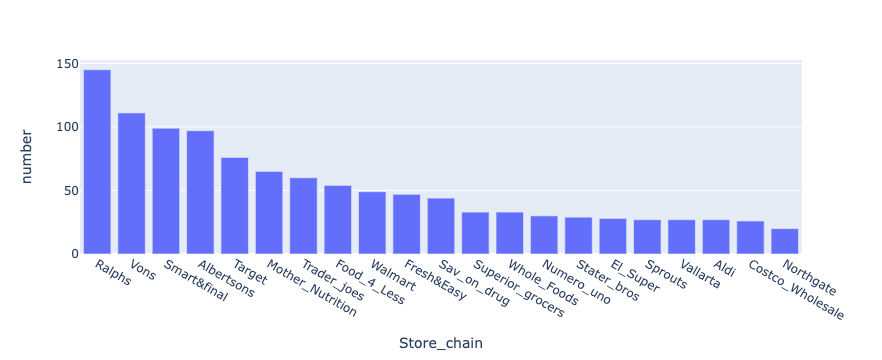

In [15]:
fig = px.bar(stores_drop,
       x='Store_chain',
       y='number'
)

fig.show()

In [16]:
gdf = gpd.GeoDataFrame(gs_trimmed, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gs_trimmed.Longitude, gs_trimmed.Latitude))

In [17]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

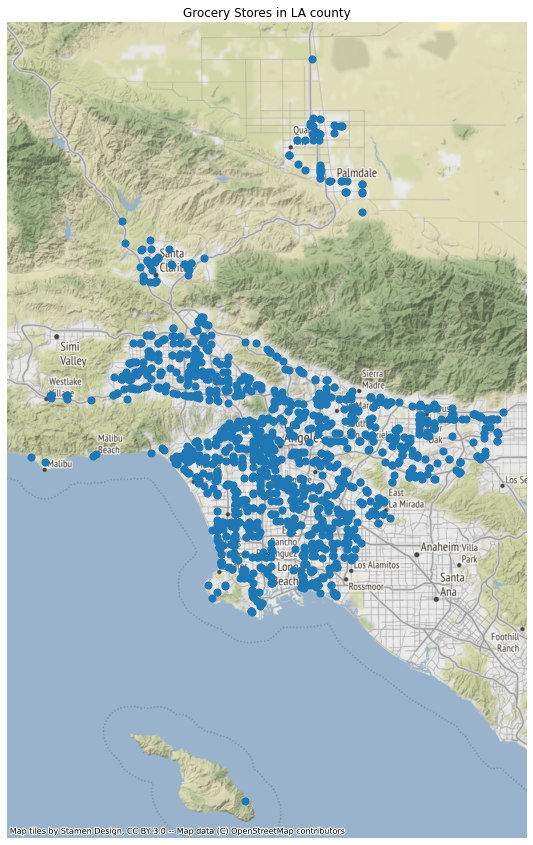

In [19]:
fig, ax = plt.subplots(figsize=(20,15))

gdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=50
                )

ax.axis('off')

ax.set_title('Grocery Stores in LA county')

ctx.add_basemap(ax)

In [20]:
indexNames = gs_trimmed[(gs_trimmed['Store_Chain'] == 'Haggen') | 
                     (gs_trimmed['Store_Chain'] == 'Jons') |
                     (gs_trimmed['Store_Chain'] == 'Gelsons') |  
                         (gs_trimmed['Store_Chain'] == 'Grocery_Outlet') |
                         (gs_trimmed['Store_Chain'] == 'Kmart') |
                         (gs_trimmed['Store_Chain'] == 'Super_A_food') |
                         (gs_trimmed['Store_Chain'] == 'Big_saver_food') |
                         (gs_trimmed['Store_Chain'] == 'Payless_food') |
                         (gs_trimmed['Store_Chain'] == 'Best_way_supermarket') |
                         (gs_trimmed['Store_Chain'] == 'Big_k_mart') |
                         (gs_trimmed['Store_Chain'] == '99 Ranch Market') |
                         (gs_trimmed['Store_Chain'] == 'Sams_club') |
                         (gs_trimmed['Store_Chain'] == 'Top_valu') |
                         (gs_trimmed['Store_Chain'] == 'Buy_low') |
                         (gs_trimmed['Store_Chain'] == 'Valu_plus') |
                         (gs_trimmed['Store_Chain'] == 'Island_Pacific') |
                         (gs_trimmed['Store_Chain'] == 'Seafood_city') |
                         (gs_trimmed['Store_Chain'] == 'H_mart') |
                         (gs_trimmed['Store_Chain'] == 'Gigante') |
                         (gs_trimmed['Store_Chain'] == 'R_ranch') |
                         (gs_trimmed['Store_Chain'] == 'Hows') |
                         (gs_trimmed['Store_Chain'] == 'Hong_kong_supermarket') |
                         (gs_trimmed['Store_Chain'] == 'Amazon') |
                         (gs_trimmed['Store_Chain'] == 'Carniceria_Vallarta') |
                        (gs_trimmed['Store_Chain'] == 'Super_king') |
                        (gs_trimmed['Store_Chain'] == 'Sav_on_drug') |
                        (gs_trimmed['Store_Chain'] == 'Fresh&Easy') |
                        (gs_trimmed['Store_Chain'] == 'Aldi') |
                        (gs_trimmed['Store_Chain'] == 'Northgate') |
                        (gs_trimmed['Store_Chain'] == 'Costco_Wholesale') |
                        (gs_trimmed['Store_Chain'] == 'Albertsons') |
                        (gs_trimmed['Store_Chain'] == 'El_Super') |
                        (gs_trimmed['Store_Chain'] == 'Mother_Nutrition') |
                        (gs_trimmed['Store_Chain'] == 'Galleria')
                      ].index


In [21]:
gs_trimmed.drop(indexNames, inplace = True)

In [22]:
gs_trimmed.info

<bound method DataFrame.info of                     Store_Name  Store_Chain Street_Number        Street_Name  \
238            FOOD 4 LESS 396  Food_4_Less          3000  Baldwin Park Blvd   
239            FOOD 4 LESS 775  Food_4_Less         12222          Carson St   
240            FOOD 4 LESS 317  Food_4_Less          6700         Cherry Ave   
241            FOOD 4 LESS 322  Food_4_Less          1651         E 103rd St   
242            FOOD 4 LESS 363  Food_4_Less          2750           E 1st St   
...                        ...          ...           ...                ...   
1372  Whole Foods Market 10177  Whole_Foods          6350           W 3rd St   
1373  Whole Foods Market 10536  Whole_Foods         12746   W Jefferson Blvd   
1374  Whole Foods Market 10545  Whole_Foods          3401        W Olive Ave   
1375  Whole Foods Market 10383  Whole_Foods           500      Wilshire Blvd   
1376  Whole Foods Market 10173  Whole_Foods          2201      Wilshire Blvd   

     Ad

In [23]:
gs_mini = gs_trimmed[['Store_Name','Store_Chain','Latitude','Longitude']].copy()
gs_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 238 to 1376
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Store_Name   773 non-null    object
 1   Store_Chain  773 non-null    object
 2   Latitude     773 non-null    object
 3   Longitude    773 non-null    object
dtypes: object(4)
memory usage: 30.2+ KB


In [24]:
gs_mini.sample(5)

Store_Name  Store_Chain  Latitude  Longitude
926   Stater Bros. Markets 168  Stater_bros  34.04225  -117.8505
1074        Target Store T2479       Target  34.09793  -118.3096
832          Smart & Final 922  Smart&final  33.83844  -118.3539
276            FOOD 4 LESS 306  Food_4_Less  34.69058  -118.1724
730                 RALPHS  91       Ralphs  34.67487  -118.1532

In [25]:
gs_mini['Latitude'] = gs_mini['Latitude'].astype(float)
gs_mini['Longitude'] = gs_mini['Longitude'].astype(float)
gs_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 238 to 1376
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store_Name   773 non-null    object 
 1   Store_Chain  773 non-null    object 
 2   Latitude     773 non-null    float64
 3   Longitude    773 non-null    float64
dtypes: float64(2), object(2)
memory usage: 30.2+ KB


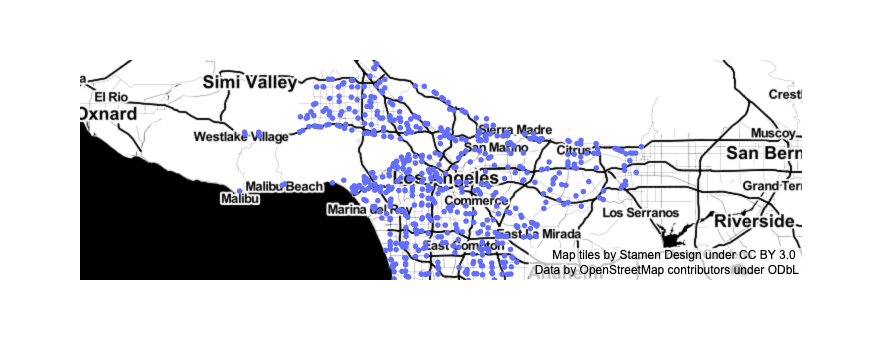

In [26]:
fig = px.scatter_mapbox(gs_mini,
                        lat='Latitude',
                        lon='Longitude',
                        mapbox_style="stamen-toner")
fig.show()

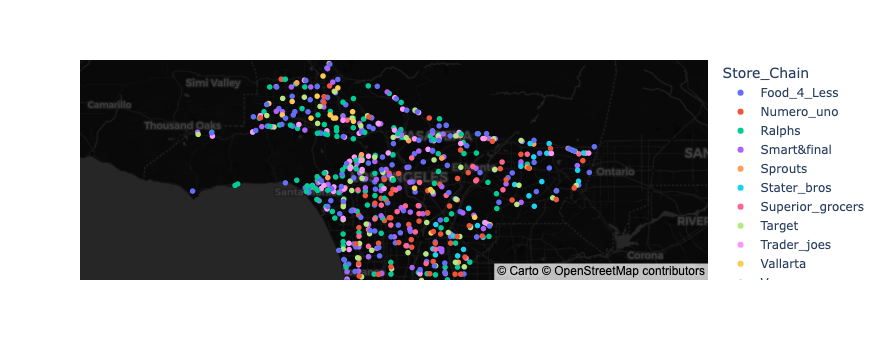

In [27]:
fig = px.scatter_mapbox(gs_mini, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Store_Chain",
                        labels={'Store_chain':'Store_chain'}
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

#Author: Jinglan Lin